# Fintech Homework 6, BlockChain and CryptoCurrency

## NTU CSIE R08922024 胡安鳳 [d = 922024]

Use the elliptic curve “secp256k1” as Bitcoin and Ethereum. Let G be
the base point in the standard. Let d be the last 6 digits of your student
ID number.

Module prequisities
pycoin ecdsa secp256k1 --> https://pycoin.readthedocs.io/en/latest/api.html
`pip3 install pycoin ecdsa`

### 1. 

In [1]:
import numpy as np
from pycoin.ecdsa.secp256k1 import secp256k1_generator as g

STU_ID = 922024

x, y = 4 * g
print('x = %s \ny = %s' %(hex(x), hex(y)))

x = 0xe493dbf1c10d80f3581e4904930b1404cc6c13900ee0758474fa94abe8c4cd13 
y = 0x51ed993ea0d455b75642e2098ea51448d967ae33bfbdfe40cfe97bdc47739922


### 2. 

In [2]:
x, y = 5 * g
print('x = %s \ny = %s' %(hex(x), hex(y)))

x = 0x2f8bde4d1a07209355b4a7250a5c5128e88b84bddc619ab7cba8d569b240efe4 
y = 0xd8ac222636e5e3d6d4dba9dda6c9c426f788271bab0d6840dca87d3aa6ac62d6


### 3. 

In [3]:
x, y = STU_ID * g
print('x = %s \ny = %s' %(hex(x), hex(y)))

x = 0x4eb5558d3cefbc3aa76064f8a529e1992b6a2eae9c955d0869fc284fc6216db9 
y = 0xb6a6a2108b1be93f13588bd3a41393ac88deb0e6f6ef9cb81ef00368cd7da92c


### 4. 

In [4]:
list_operations = []
STU_ID = 922024
num = STU_ID

while num > 1:
    if num & 0x1 == 1:
        list_operations.append('a')
        num -= 1
    else:
        list_operations.append('d')
        num >>= 1

print('binary representation of 922024: ', bin(STU_ID))
print('add %d times ' % (list_operations.count('a')))
print('double %d times ' % (list_operations.count('d')))
print('total %d times' % (len(list_operations)))
print('datailed steps ', list_operations)


binary representation of 922024:  0b11100001000110101000
add 7 times 
double 19 times 
total 26 times
datailed steps  ['d', 'd', 'd', 'a', 'd', 'd', 'a', 'd', 'd', 'a', 'd', 'a', 'd', 'd', 'd', 'd', 'a', 'd', 'd', 'd', 'd', 'd', 'a', 'd', 'a', 'd']


### 5.  (My STU_ID represented in binary form does not contain continuous 1's more than 3 times in the middle part of string, so I use 961533 instead for performance comparison)

dada --> adds (no improvent for performance)
dadada --> addds equivalent to 111 = (0 + 1) << 3 and then subtract 1
dadadada ---> adddds equivalent to 1111 = (0 + 1) << 4 then subtract 1

such method can be done in a greedy manner

In [5]:
list_operations = []
binary_str = ''
num = 961533

while num > 1:
    if num & 0x1 == 1:
        list_operations.append('a')
        binary_str += '1'
        num -= 1
    else:
        list_operations.append('d')
        binary_str += '0'
        num >>= 1
    
print(list_operations)
print('binary representation of 961533: ', bin(961533))
print('add %d times ' % (list_operations.count('a')))
print('double %d times ' % (list_operations.count('d')))
print('total %d times' % (len(list_operations)))
print('datailed steps ', list_operations)

#--------------------- optimized algorithm ---------------------#
# build a replace list, dadada --> addds, dadadada ---> adddds

print('\n------------- optimized algorithm below---------------\n')
replace_pair = []
half = len(binary_str) >> 1
if half % 2:
    half -= 1

# greedy approach
for i in range(3, half + 1):
    replace_pair.append(('da' * i, 'a' + 'd' * i + 's'))

str_operations = ''.join(list_operations)
for each_pair in reversed(replace_pair):
    target_str, new_str = each_pair
    str_operations = str_operations.replace(target_str, new_str)

list_operations = list(str_operations)
    
print('binary representation of 961533: ', bin(961533))
print('add %d times ' % (list_operations.count('a')))
print('double %d times ' % (list_operations.count('d')))
print('subtract %d times ' % (list_operations.count('s')))
print('total %d times' % (len(list_operations)))
print('datailed steps ', list_operations)

['a', 'd', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'd', 'a', 'd', 'd', 'a', 'd', 'd', 'a', 'd', 'd', 'a', 'd', 'a', 'd']
binary representation of 961533:  0b11101010101111111101
add 14 times 
double 19 times 
total 33 times
datailed steps  ['a', 'd', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'a', 'd', 'd', 'a', 'd', 'd', 'a', 'd', 'd', 'a', 'd', 'd', 'a', 'd', 'a', 'd']

------------- optimized algorithm below---------------

binary representation of 961533:  0b11101010101111111101
add 7 times 
double 19 times 
subtract 1 times 
total 27 times
datailed steps  ['a', 'd', 'a', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 'd', 's', 'd', 'd', 'a', 'd', 'd', 'a', 'd', 'd', 'a', 'd', 'd', 'a', 'd', 'a', 'd']


### 6, 7 
Take this transaction from bitcoin official website as an example.
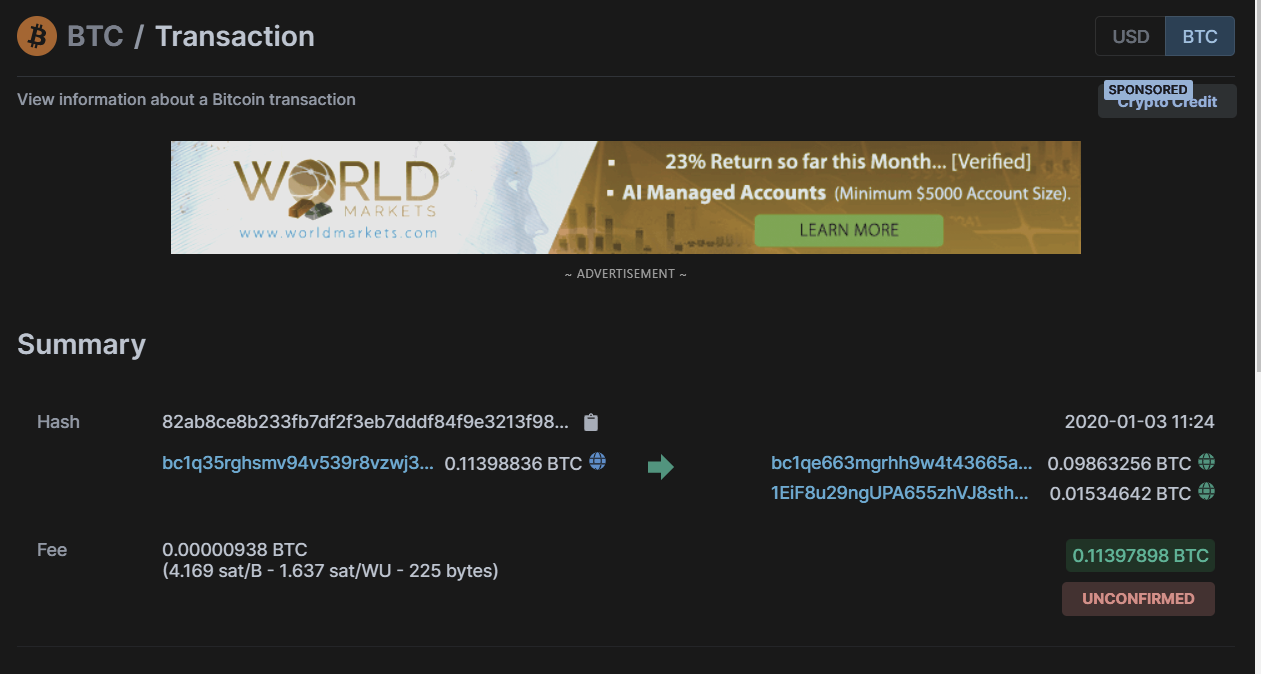

[Link of this transaction](https://www.blockchain.com/btc/tx/82ab8ce8b233fb7df2f3eb7dddf84f9e3213f98ed48a7548051573858d6df1ab)

In [6]:
import hashlib

STU_ID = 922024

def exgcd(a, b, x, y):
    if a == 0:
        x = 0
        y = 1
        return x, y, b
    
    x1 = 0
    y1 = 0
    x1, y1, gcd = exgcd(b % a, a, x1, y1)
    x = y1 - (b // a) * x1
    y = x1
    
    return x, y, gcd

def modinv(a, m):
    x, y, gcd = exgcd(a, m, 0, 0)
    assert gcd == 1, 'Modular inverse does not exist'
    
    return (x % m + m) % m


# step referencing to ECDSA signing in blockchain ppt - 3
def signing():
    print('\n--------------ECDSA Signing-----------------\n')
    # 1. calculate msg_hashed = HASH(msg)
    msg = 'R08922024'
    hash_func = hashlib.sha256()
    hash_func.update(msg.encode('utf-8'))
    msg_hashed = hash_func.hexdigest()
    print('msg_hashed = ', msg_hashed)
    
    # 2~4. Random k and calculate (x1, y1) = k * G
    dA = STU_ID # use as private key
    QA = dA * g # QA = dA * G
    n_order = g.order()
    print('order of G = ', n_order)
    k = 2 # select k [1, n - 1], this is the ephemeral key
    x1, y1 = k * g
    
    # 5. calculate r = x1 mod n, k and n_order should be co-prime, otherwise no 
    # modinv exists.
    k_modinv = modinv(k, n_order)
    r = x1 % n_order
    
    # 6, calculate s = k ^ -1 (z + rdA) mod n
    msg_hashed = 0x82ab8ce8b233fb7df2f3eb7dddf84f9e3213f98ed48a7548051573858d6df1ab
    s = k_modinv * (msg_hashed + r * dA) % n_order
    print('r = %s \ns = %s' % (hex(r), hex(s)))
    
    return n_order, r, s, msg_hashed, QA
    
# step referencing to ECDSA signing in blockchain ppt - 3
def verifying(n_order, r, s, msg_hashed, QA):
    print('\n--------------ECDSA Verifying-----------------\n')
    
    n_order
    if r < 1 or r > n_order:
        print('verifying failed, error code 2')
        exit(2)
    elif s < 1 or s > n_order:
        print('verifying failed, error code 3')
        exit(3)
    
    # calculate w = s ^ -1 mod n
    w = modinv(s, n_order)
    u1 = msg_hashed * w % n_order
    u2 = r * w % n_order
    x1, y1 = (u1 * g + u2 * QA)
    
    if r % n_order == x1:
        print('signature verified successfully')
    

n_order, r, s, msg_hashed, QA= signing()
verifying(n_order, r, s, msg_hashed, QA)


--------------ECDSA Signing-----------------

msg_hashed =  7003b599f401d2169a86845cf20d813c8e6d2fec18dc2ebd928d4f2dbcfc9b6c
order of G =  115792089237316195423570985008687907852837564279074904382605163141518161494337
r = 0xc6047f9441ed7d6d3045406e95c07cd85c778e4b8cef3ca7abac09b95c709ee5 
s = 0x5e19dcc8cbad9791dfdcde44603bbf42ea1593c3a20518b2faab7e2422c83526

--------------ECDSA Verifying-----------------

signature verified successfully
